In [1]:
import math
from scipy.integrate import RK45
import matplotlib.pyplot as plt

In [2]:

def func(t, x, u):
    u1, u2 = u
    x1, x2, x3 = x
    dx3 = (0.25 * u1 * math.cos(x1/2) + 0.25 * u2 * math.cos(x2/2) + (
  u1 * (0.26 * math.sin(x1) - 0.0625 * math.sin(x1 + x2)) + 
   u2 * (0.26 * math.sin(x2) - 0.0625 * math.sin(x1 + x2)))/math.sqrt(
  1.2066 - 0.52 * math.cos(x1) - 0.52 * math.cos(2)+ 0.125 * math.cos(x1 + x2)))
    return np.array([u1, u2, dx3])

In [3]:
import numpy as np

In [4]:
max_angle = math.pi * 8/9
def get_output(x):
    left_output = 0.5
    right_output = 1
    left_arm, right_arm, takeup = x
    if left_arm >= max_angle:
        left_output = 0
    if right_arm >= max_angle:
        right_output = 0
    
    return np.array([left_output, right_output])

In [5]:
sim_time = 5
sim_step_time = 0.02
integrator = RK45(lambda t, x: func(t, x, get_output(x)), 0, np.array([1.57, 0.0, 0.0]), sim_time, sim_step_time)
time = []
output = np.zeros((0, 3))
for step in range(int(sim_time / sim_step_time)):
    integrator.step()
    time.append(integrator.t)
    
    output = np.append(output,[integrator.y],axis= 0)

    

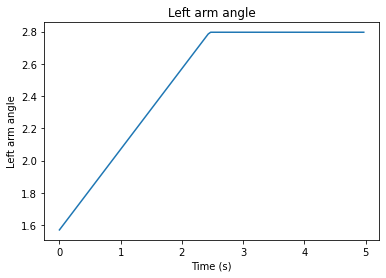

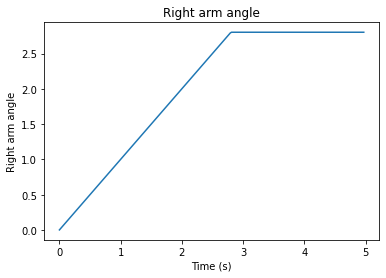

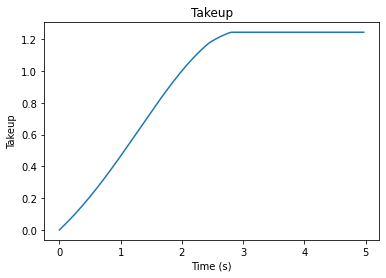

In [7]:
var_list = ["Left arm angle", "Right arm angle", "Takeup"]
for state in range(output.shape[1]):
    plt.figure()
    plt.plot(time, output[:, state])
    plt.title(var_list[state])
    plt.xlabel("Time (s)")
    plt.ylabel(f"{var_list[state]}")